# Regression - Noise


random data using a linear model plus some random (gaussian) noise $\epsilon$:  
$y_i = a \cdot x_i + b + \epsilon_i$  

The goal is to recover the parameters a and b of the linear model from data.

1. Generate sample data using rng and lambda functions  
2. Use Sklearn to fit a linear model. If there was no noise $\epsilon$, then we would recover the parameters a and b.
3. In the presence of noise, we will observe some variability.  

The more datapoints we have, the more precise is our estimate of a and b  
The less noise the data has, the more precise is our estimate of a and b. 

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sb

import numpy as np
from numpy.random import default_rng
# Setup rng for later use
rng = default_rng()

Create Linear Model Function

In [4]:
# define a linear function. Note that it automatically adds random noise
lin_function = lambda X, a, b, s=1 : a*X + b + rng.normal(loc=0.0, scale=s, size=X.shape)

# example call. Pass a single value x=5. Note that we cannot directly pass the scalar value but we create an array with a single value
y_1 = lin_function(np.array(5), 1, 2, s=0)
print(y_1)

# example call: To add noise, we set standard-deviation to 1.0
y_2 = lin_function(np.array(5), 1, 2, s=1)
print(y_2)

# example call: Pass to x values in an array. 
y_3 = lin_function(np.array([5, 100]), 1, 2, s=1)
print(y_3)
print(y_3.shape)

7.0
7.981413504151882
[  5.81424358 101.90332395]
(2,)


In [6]:
# define the data set.
data_X = np.array([-4,   -2,   1,  2.5,  3.9])

# generate data using the linear model
slope=-1
intercept = 20
Y_gen = lin_function(data_X, slope, intercept)

Text(0.5, 1.0, 'Generated data (3 example sets). \nThe different y-values are due to the random noise')

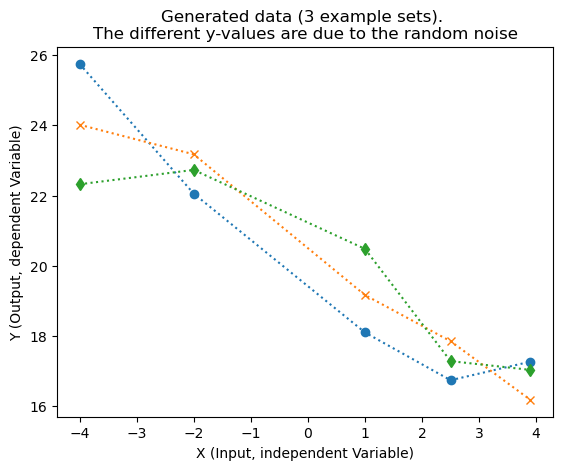

In [7]:
# Visualize the generated data.
plt.plot(data_X, Y_gen, ':o')
# generate two more random data sets. 
plt.plot(data_X, lin_function(data_X, slope, intercept), ':x')
plt.plot(data_X, lin_function(data_X, slope, intercept), ':d')
plt.xlabel('X (Input, independent Variable)')
plt.ylabel('Y (Output, dependent Variable)')
plt.title('Generated data (3 example sets). \nThe different y-values are due to the random noise')

## Generate Noise Data

1. Generate 100 uniformly distributed samples in [-50, +50].
2. Generate noisy Y using the anonymous function lin_model(). slope=+0.4, intercept = -7. 
3. Visualize the data in a scatter plot.

In [8]:
data_X = rng.uniform(-50,50,100)
gen_Y = lin_function(data_X, +0.4, -7.0)

Text(0, 0.5, 'y')

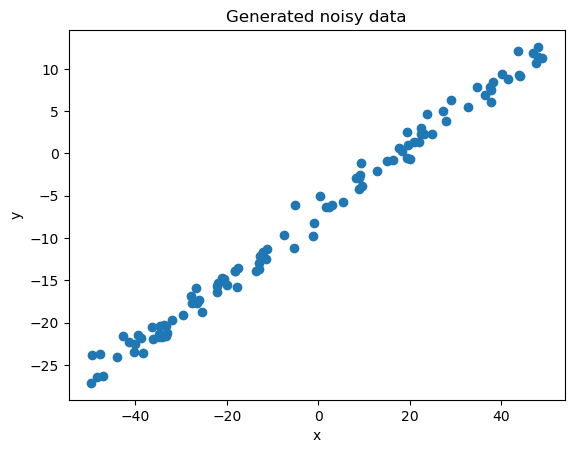

In [9]:
plt.scatter(data_X, gen_Y)
plt.title('Generated noisy data')
plt.xlabel('x')
plt.ylabel('y')

## Fit a linear model to the noisy data
1. Use scikit-learn to fit a two-parameter linear model to data. 
2. Calculate the residuals and visualize

In [11]:
from sklearn import linear_model

linear_regression_model = linear_model.LinearRegression()
#The new shape should be compatible with the original shape. 
#If an integer, then the result will be a 1-D array of that length. 
#One shape dimension can be -1. In this case, the value is inferred 
#from the length of the array and remaining dimensions.

#`data_X.reshape(-1, 1)`: The `reshape(-1, 1)` function is used to reshape 
#the data into a 2D array, which is the required input shape for the `fit` method. 
#The `-1` means that the size in that dimension is inferred from the length of 
#the array and the remaining dimensions.

# `np.squeeze(gen_Y)`: `np.squeeze()` is a numpy function that removes single-dimensional 
#entries from the shape of an array. Here, it's used to ensure that `gen_Y` has the correct shape. 
#The `fit` method expects `y` to be a 1D array, so `np.squeeze(gen_Y)` is used to remove 
#any extra dimensions that `gen_Y` might have.

linear_regression_model.fit(data_X.reshape(-1, 1), np.squeeze(gen_Y))

LinearRegression()

In [12]:
a = linear_regression_model.coef_[0]
b = linear_regression_model.intercept_
print((a,b))


(0.39396227027329955, -6.979561168181824)


[[-50], [50]]

Text(37.597222222222214, 0.5, 'residuals')

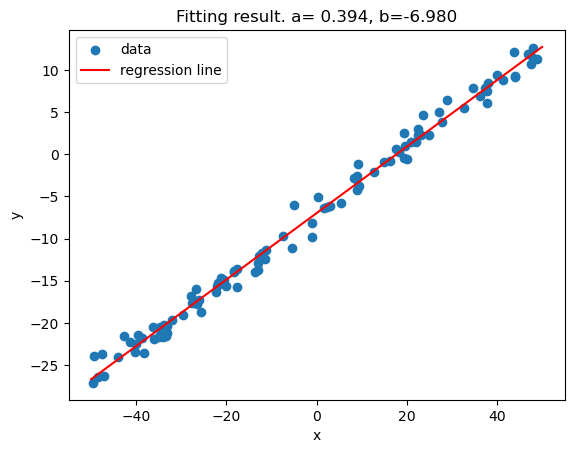

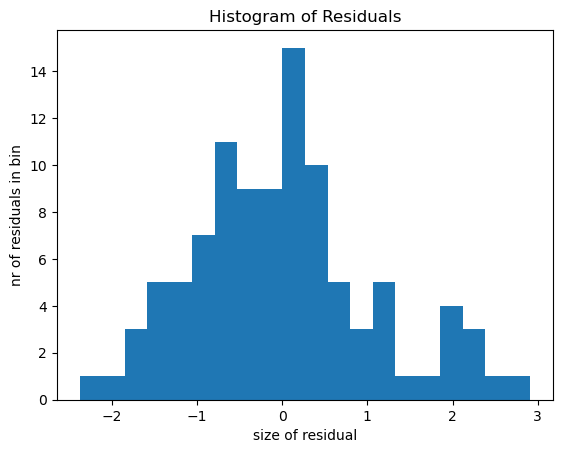

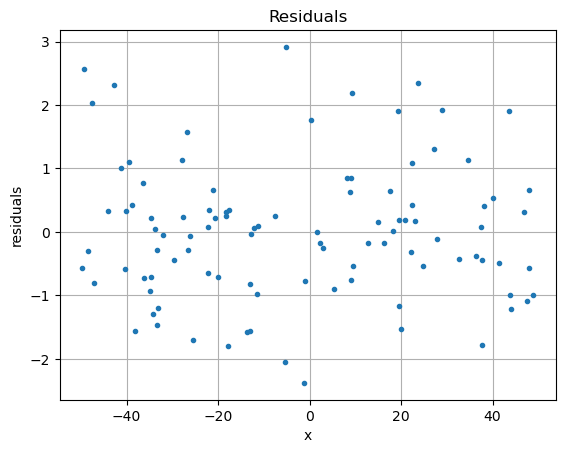

<Figure size 640x480 with 0 Axes>

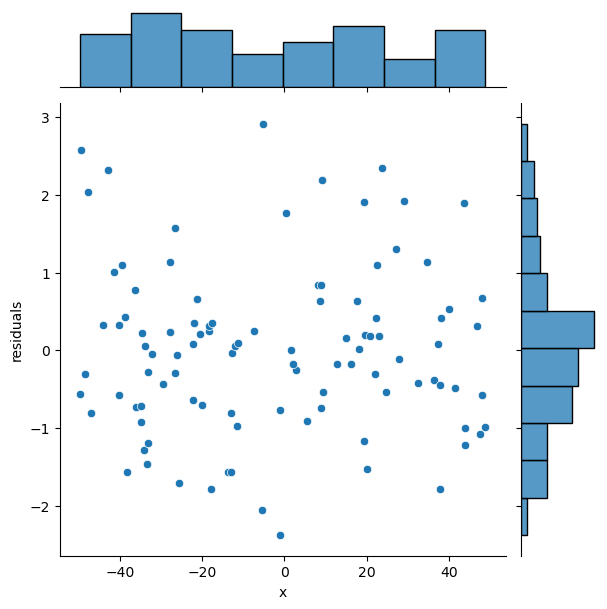

In [13]:
# To visualize the resulting line, we only need two points and connect them with a line (alternatively, and more typical,
# we could also just use the input data data_X).
# We use the linear regression object (linear_regression_model) to calculate y at the "left" and "right" end of the domain:
x = [ [-50], [50] ]  # the predict-function expects a 2dim array.
display (x)
predicted_Y = linear_regression_model.predict(x)

plt.scatter(data_X, gen_Y, label='data')
plt.plot(x,predicted_Y, 'r', label='regression line')
plt.legend() #note: the legend shows the labels provided when plotting
plt.title('Fitting result. a={:6.3f}, b={:6.3f}'.format(a, b))  #https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python
plt.xlabel('x')
plt.ylabel('y')

#residuals:
residuals = gen_Y - linear_regression_model.predict(data_X.reshape(-1, 1))
plt.figure()
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('size of residual')
plt.ylabel('nr of residuals in bin')

plt.figure()
plt.plot(data_X, residuals, '.')
#plt.hlines(0, -50, 50, 'k')
plt.grid()
plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('residuals')


# alternatively we can plot the x and residuals using seaborn's jointplot:
plt.figure()
sb.jointplot(x=data_X, y=residuals)
plt.xlabel('x')
plt.ylabel('residuals')


- In the absence of noise, we are able to recover these two values. 
- The regression line is influenced by the presence of noise.
- The quality of the fit depends on the noise-level (standard deviation) and on the sample size.

- Plotting the residuals against x also shows that the residuals are of similar size across the entire domain. This tells us, that the linear model is an appropriate model for this data.

- The jointplot shows the marginal distributions as histograms. The result is ideal: we have data evenly  distributed across the entire domain (uniform distribution in -50/+50) while the residuals are centered at 0 (normal distribution)

We see two trends:  
- the more samples, the more reliable is the fit
- the less noise, the more reliable is the fit

Note: If we work with real data
- we do not know the 'true' model
- we do not know the true parameters (slope and intercept). We therefore need to estimate the reliability of the values we report (typically a confidence interval)
- we do not know the noise level in the data (standard-deviation).
- we do not know if the noise is gaussian. We have to plot and analyze the residuals.
- we do not know if the samples are representative. We therefore need to be careful when we use data and verify if it has been collected in a reasonable way. 
